In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [25]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/final/RTE3/DEV_'+str(i+1)+'.csv.pickle')
    else:
        temp = pd.read_pickle('salida/final/RTE3/DEV_'+str(i+1)+'.csv.pickle')
        train=pd.concat([train,temp])

In [26]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,0.000000,0.000000,2.166,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,bai...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.000000,0.000000,0.000000,0.000000,"[tax bill, originally sold, little known, know...","[Baikalfinansgroup, Rosneft]",1.0,YES
1,0.000000,0.000000,1.970,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,yug...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.600000,0.500000,0.333333,0.000000,"[tax bill, originally sold, little known, know...","[Yuganskneftegaz cost, Yuganskneftegaz cost 27...",0.0,NO
2,0.000000,0.000000,2.754,0.000,0.000000,0.000000,0.000000,1.000000,1,0,...,"does{do,AUX} ...",Empty DataFrame Columns: [] Index: [loraine{lo...,0.333333,0.125000,0.000000,0.000000,"[Loraine, Loraine, London, United Kingdom]",[London],1.0,UNKNOWN
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"the{the,DET} extr...","Empty DataFrame Columns: [] Index: [the{the,DE...",0.500000,0.200000,0.000000,0.000000,"[town girl, followed earlier, earlier films, f...","[Sennett, Extra Girl was produced Sennett ]",0.0,YES
4,-0.442936,146.821869,2.735,1.473,4.089147,0.002735,0.231184,-0.106360,0,0,...,"30{30,NUM} die{die...","die{die,VERB} a{a,D...",0.428571,0.166667,0.000000,0.045455,"[bus collision, Uganda]","[bus collision, Uganda]",1.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,156.604034,2.763,2.643,4.006609,0.002715,0.576517,0.268804,0,0,...,"haque{haque,...","wants{want,V...",0.285714,0.166667,0.000000,0.040000,"[grading papers, understand answers, answers w...","[Haque, Haque wants to include English in some...",0.5,UNKNOWN
796,0.000000,0.000000,2.651,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"the{the,DET} ...",Empty DataFrame Columns: [] Index: [iscor{isco...,0.545455,0.200000,0.000000,0.000000,"[South African, African iron, steel manufactur...","[South African, African steel, steel manufactu...",0.6,YES
797,0.000000,0.000000,2.702,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"the{the,DET...",Empty DataFrame Columns: [] Index: [critics{cr...,0.428571,0.333333,0.200000,0.000000,"[Critics said, main qualification, high school...","[NCEA, NCEA has been degraded authority ]",0.0,UNKNOWN
798,0.000000,0.000000,2.783,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,"tyler{tyler,PR...","Empty DataFrame Columns: [] Index: [two{two,NU...",0.428571,0.000000,0.000000,0.000000,"[pleaded guilty, aggravated assault, obstruct ...",[Tyler Jackson],1.0,NO


<Axes: title={'center': 'list_trigram'}, xlabel='clases'>

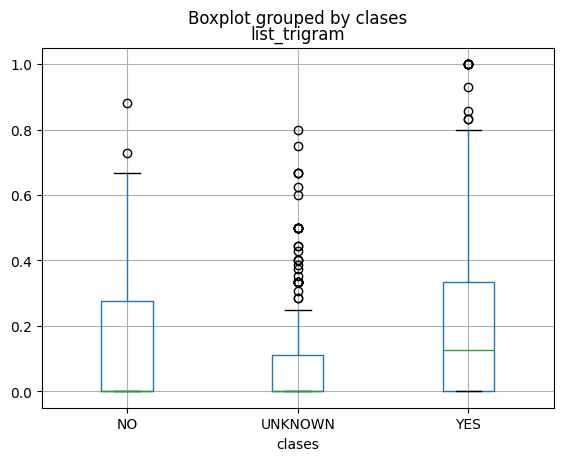

In [27]:
train.boxplot(by="clases",column="list_trigram")

## Eliminar características

In [28]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_rel,clases
0,0.000000,0.000000,2.166,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,5,0,40,0.000000,0.000000,0.000000,0.000000,1.0,YES
1,0.000000,0.000000,1.970,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,6,0,39,0.600000,0.500000,0.333333,0.000000,0.0,NO
2,0.000000,0.000000,2.754,0.000,0.000000,0.000000,0.000000,1.000000,1,0,0,10,0,45,0.333333,0.125000,0.000000,0.000000,1.0,UNKNOWN
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,7,0,60,0.500000,0.200000,0.000000,0.000000,0.0,YES
4,-0.442936,146.821869,2.735,1.473,4.089147,0.002735,0.231184,-0.106360,0,0,0,8,1,22,0.428571,0.166667,0.000000,0.045455,1.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,156.604034,2.763,2.643,4.006609,0.002715,0.576517,0.268804,0,0,0,8,1,25,0.285714,0.166667,0.000000,0.040000,0.5,UNKNOWN
796,0.000000,0.000000,2.651,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,12,0,35,0.545455,0.200000,0.000000,0.000000,0.6,YES
797,0.000000,0.000000,2.702,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,29,0.428571,0.333333,0.200000,0.000000,0.0,UNKNOWN
798,0.000000,0.000000,2.783,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,31,0.428571,0.000000,0.000000,0.000000,1.0,NO


In [29]:
#train["entropias"]=train["entropias"]/train["entropia_total"]

In [30]:
train=train.drop(["max_info","similitud_faltantes","list_trigram","list_cuatrigram","diferencias","list_m","list_M","list_T"],axis=1)

In [31]:
#train["list_M"] = train["list_M"] / train["list_T"]
#train["list_m"] = train["list_m"] / train["list_M"]
#train["list_M"] = (train["list_M"] - train["list_m"])/train["list_T"]

In [32]:
#train=train.drop(["list_m","list_T"],axis=1)

In [33]:
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_bigram,bi_ent_trip_rel,clases
0,0.000000,0.000000,2.166,0.000,0.000000,0.000000,0,0,0,0.000000,1.0,YES
1,0.000000,0.000000,1.970,0.000,0.000000,0.000000,0,0,1,0.600000,0.0,NO
2,0.000000,0.000000,2.754,0.000,0.000000,0.000000,1,0,0,0.333333,1.0,UNKNOWN
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0,0,0,0.500000,0.0,YES
4,-0.442936,146.821869,2.735,1.473,4.089147,0.002735,0,0,0,0.428571,1.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,156.604034,2.763,2.643,4.006609,0.002715,0,0,0,0.285714,0.5,UNKNOWN
796,0.000000,0.000000,2.651,0.000,0.000000,0.000000,0,0,0,0.545455,0.6,YES
797,0.000000,0.000000,2.702,0.000,0.000000,0.000000,0,0,0,0.428571,0.0,UNKNOWN
798,0.000000,0.000000,2.783,0.000,0.000000,0.000000,0,0,0,0.428571,1.0,NO


In [34]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [35]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [36]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_bigram,bi_ent_trip_rel
sumas,1.000000,0.430103,0.115577,0.746686,0.720436,0.306145,-0.014780,-0.004871,0.082900,-0.265310,-0.264565
distancias,0.430103,1.000000,0.073137,0.600234,0.561520,0.309996,0.075475,0.137001,0.154098,-0.383262,-0.355324
entropia_total,0.115577,0.073137,1.000000,0.112751,0.080480,-0.015225,0.018682,0.048863,0.116155,0.089375,-0.065811
entropias,0.746686,0.600234,0.112751,1.000000,0.978333,0.451925,-0.007750,0.011145,0.073514,-0.389385,-0.314707
mutinf,0.720436,0.561520,0.080480,0.978333,1.000000,0.452224,-0.009199,-0.003315,0.061027,-0.375464,-0.298699
mearts,0.306145,0.309996,-0.015225,0.451925,0.452224,1.000000,-0.015183,-0.006314,0.008353,-0.197727,-0.168078
list_comp,-0.014780,0.075475,0.018682,-0.007750,-0.009199,-0.015183,1.000000,0.058425,0.004734,-0.155362,-0.110389
list_incomp,-0.004871,0.137001,0.048863,0.011145,-0.003315,-0.006314,0.058425,1.000000,-0.033997,-0.135094,-0.116784
list_rel_con,0.082900,0.154098,0.116155,0.073514,0.061027,0.008353,0.004734,-0.033997,1.000000,-0.233571,-0.223451
list_bigram,-0.265310,-0.383262,0.089375,-0.389385,-0.375464,-0.197727,-0.155362,-0.135094,-0.233571,1.000000,0.500812


In [37]:
print(train_m.idxmin(),train_m.min())

sumas                  list_bigram
distancias             list_bigram
entropia_total     bi_ent_trip_rel
entropias              list_bigram
mutinf                 list_bigram
mearts                 list_bigram
list_comp              list_bigram
list_incomp            list_bigram
list_rel_con           list_bigram
list_bigram              entropias
bi_ent_trip_rel         distancias
dtype: object sumas             -0.265310
distancias        -0.383262
entropia_total    -0.065811
entropias         -0.389385
mutinf            -0.375464
mearts            -0.197727
list_comp         -0.155362
list_incomp       -0.135094
list_rel_con      -0.233571
list_bigram       -0.389385
bi_ent_trip_rel   -0.355324
dtype: float64


<Axes: >

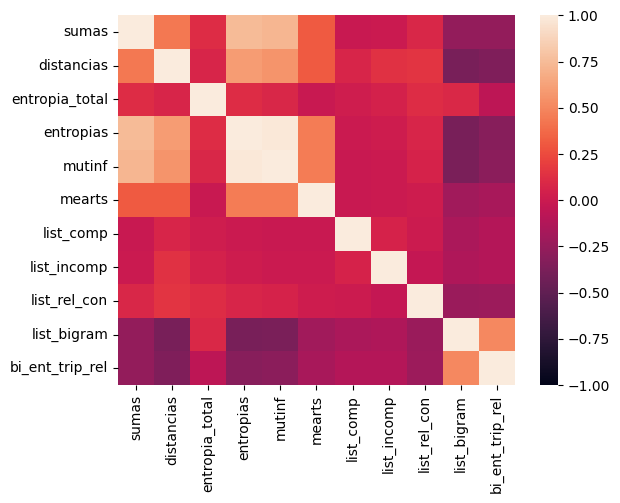

In [38]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [39]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_bigram,bi_ent_trip_rel
sumas,1.000000,0.430103,0.115577,0.746686,0.720436,0.306145,-0.014780,-0.004871,0.082900,-0.265310,-0.264565
distancias,0.430103,1.000000,0.073137,0.600234,0.561520,0.309996,0.075475,0.137001,0.154098,-0.383262,-0.355324
entropia_total,0.115577,0.073137,1.000000,0.112751,0.080480,-0.015225,0.018682,0.048863,0.116155,0.089375,-0.065811
entropias,0.746686,0.600234,0.112751,1.000000,0.978333,0.451925,-0.007750,0.011145,0.073514,-0.389385,-0.314707
mutinf,0.720436,0.561520,0.080480,0.978333,1.000000,0.452224,-0.009199,-0.003315,0.061027,-0.375464,-0.298699
mearts,0.306145,0.309996,-0.015225,0.451925,0.452224,1.000000,-0.015183,-0.006314,0.008353,-0.197727,-0.168078
list_comp,-0.014780,0.075475,0.018682,-0.007750,-0.009199,-0.015183,1.000000,0.058425,0.004734,-0.155362,-0.110389
list_incomp,-0.004871,0.137001,0.048863,0.011145,-0.003315,-0.006314,0.058425,1.000000,-0.033997,-0.135094,-0.116784
list_rel_con,0.082900,0.154098,0.116155,0.073514,0.061027,0.008353,0.004734,-0.033997,1.000000,-0.233571,-0.223451
list_bigram,-0.265310,-0.383262,0.089375,-0.389385,-0.375464,-0.197727,-0.155362,-0.135094,-0.233571,1.000000,0.500812


In [40]:
# Checar variables colineales
#sns.relplot(data=train_m, x="list_bigram", y="list_cuatrigram")

In [41]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [42]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

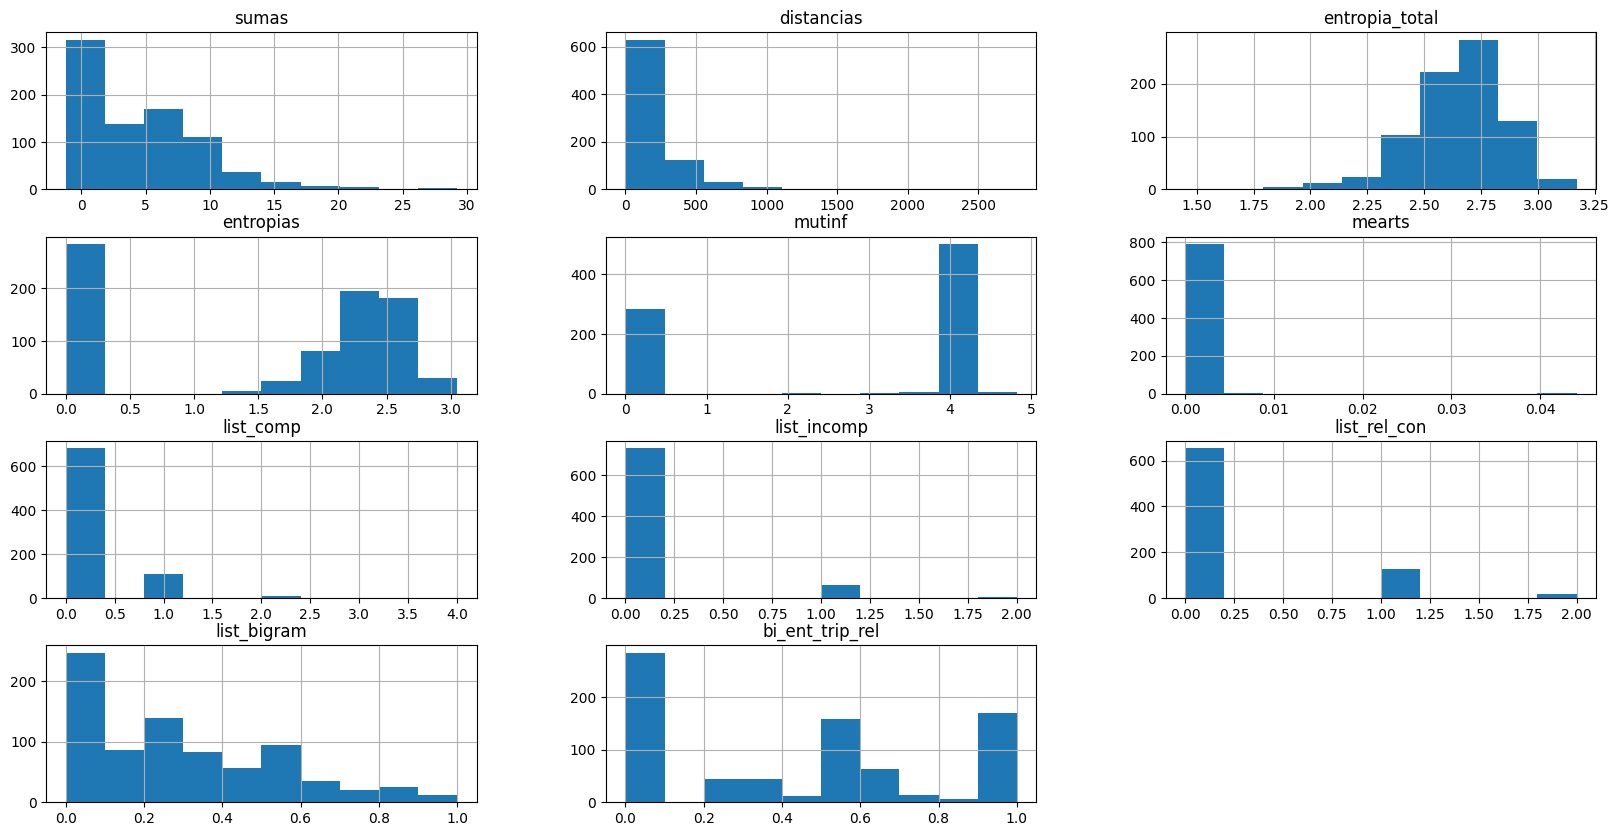

In [43]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [44]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/final/GHS/respaldo/GHS_'+str(i+1)+'.csv.pickle')
    else:
        temp = pd.read_pickle('salida/final/GHS/respaldo/GHS_'+str(i+1)+'.csv.pickle')
        test=pd.concat([test,temp])

In [45]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_t,bi_ent_trip_h,bi_ent_trip_rel,clases
0,8.630107,119.110451,2.424,2.695,4.691659,0.000000,1.000000,0.579012,0,0,...,british{briti...,jobless{joble...,0.000000,0.00,0.0,0.038462,"[British firm, work scheme, solve chronic, chr...","[British firm, aid jobless, Israel]",0.666667,ENTAILMENT
1,4.096975,2426.427002,2.624,2.534,3.948094,0.003109,0.423813,0.768742,0,0,...,betfair{bet...,betfair{bet...,0.000000,0.00,0.0,1.235294,[suspicious races],"[security department, unusual betting, betting...",0.000000,NONENTAILMENT
2,6.543147,1330.416260,2.675,2.556,4.016602,0.002445,0.434243,0.659515,0,1,...,"baker{baker,PROPN}...",association{associ...,0.052632,0.00,0.0,0.285714,"[truth approaches, mental peak, Baker]","[closely tracks, rapid progress, hurdling rank...",0.250000,NONENTAILMENT
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0.000000,1.000000,2,0,...,"ofcom{ofcom,PROPN...","Empty DataFrame Columns: [] Index: [the{the,DE...",0.142857,0.00,0.0,0.000000,"[premium rate, rate phone, phone services, tel...","[scrutinize regulation, premium rate, rate cal...",0.500000,ENTAILMENT
4,2.474558,2171.139160,2.887,2.758,3.919306,0.003232,0.369453,0.588275,0,0,...,"the{the,DET} haiku{...","haiku{haiku,ADJ} li...",0.000000,0.00,0.0,1.400000,"[contain playful, quizzical words, Ben Somewhe...","[like form, texts reminded, early songs, brief...",0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.728646,1620.749390,2.787,2.643,4.011618,0.002651,0.359757,0.365441,0,2,...,"hit{hit,VERB} i...","30{30,NUM} %{%,...",0.000000,0.00,0.0,0.333333,"[expansion plans, chief executive, temporary b...","[joint venture, cable company, public service,...",0.125000,NONENTAILMENT
796,7.477303,445.711975,2.799,2.843,4.002126,0.002690,0.462773,0.424251,0,0,...,"war{war,NOUN} cr...","push{push,VERB} ...",0.125000,0.00,0.0,0.069767,"[possibly imminent, imminent indictment, war c...","[War crimes, crimes indictment, push teetering...",0.200000,ENTAILMENT
797,3.361390,2565.480469,2.718,2.669,4.004176,0.002859,0.389013,0.540715,0,0,...,"i{I,PRON} enjoy...","i{I,PRON} enjoy...",0.000000,0.00,0.0,0.642857,"[new season, season looms, Johnson, Johnson ci...","[different sort, championship titles, Johnson,...",0.166667,NONENTAILMENT
798,4.774510,1325.088867,2.600,2.705,3.992369,0.002735,0.443457,0.566489,0,0,...,"even{even,ADV} sa...","even{even,ADV} n'...",0.076923,0.04,0.0,0.312500,"[days later, forbidding razor, razor wire, rei...","[said yesterday, demonstrators arrived, main g...",0.000000,NONENTAILMENT


In [46]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf","bi_ent_trip_t","bi_ent_trip_h"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,bi_ent_trip_rel,clases
0,8.630107,119.110451,2.424,2.695,4.691659,0.000000,1.000000,0.579012,0,0,1,7,1,26,0.000000,0.00,0.0,0.038462,0.666667,ENTAILMENT
1,4.096975,2426.427002,2.624,2.534,3.948094,0.003109,0.423813,0.768742,0,0,1,40,21,17,0.000000,0.00,0.0,1.235294,0.000000,NONENTAILMENT
2,6.543147,1330.416260,2.675,2.556,4.016602,0.002445,0.434243,0.659515,0,1,0,20,10,35,0.052632,0.00,0.0,0.285714,0.250000,NONENTAILMENT
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0.000000,1.000000,2,0,0,8,0,18,0.142857,0.00,0.0,0.000000,0.500000,ENTAILMENT
4,2.474558,2171.139160,2.887,2.758,3.919306,0.003232,0.369453,0.588275,0,0,2,40,21,15,0.000000,0.00,0.0,1.400000,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.728646,1620.749390,2.787,2.643,4.011618,0.002651,0.359757,0.365441,0,2,1,30,11,33,0.000000,0.00,0.0,0.333333,0.125000,NONENTAILMENT
796,7.477303,445.711975,2.799,2.843,4.002126,0.002690,0.462773,0.424251,0,0,0,9,3,43,0.125000,0.00,0.0,0.069767,0.200000,ENTAILMENT
797,3.361390,2565.480469,2.718,2.669,4.004176,0.002859,0.389013,0.540715,0,0,0,30,18,28,0.000000,0.00,0.0,0.642857,0.166667,NONENTAILMENT
798,4.774510,1325.088867,2.600,2.705,3.992369,0.002735,0.443457,0.566489,0,0,4,27,10,32,0.076923,0.04,0.0,0.312500,0.000000,NONENTAILMENT


In [47]:
#test["entropias"]=test["entropias"]/test["entropia_total"]

In [48]:
test=test.drop(["max_info","similitud_faltantes","list_trigram","list_cuatrigram","diferencias","list_m","list_M","list_T"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_bigram,bi_ent_trip_rel,clases
0,8.630107,119.110451,2.424,2.695,4.691659,0.000000,0,0,1,0.000000,0.666667,ENTAILMENT
1,4.096975,2426.427002,2.624,2.534,3.948094,0.003109,0,0,1,0.000000,0.000000,NONENTAILMENT
2,6.543147,1330.416260,2.675,2.556,4.016602,0.002445,0,1,0,0.052632,0.250000,NONENTAILMENT
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,2,0,0,0.142857,0.500000,ENTAILMENT
4,2.474558,2171.139160,2.887,2.758,3.919306,0.003232,0,0,2,0.000000,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.728646,1620.749390,2.787,2.643,4.011618,0.002651,0,2,1,0.000000,0.125000,NONENTAILMENT
796,7.477303,445.711975,2.799,2.843,4.002126,0.002690,0,0,0,0.125000,0.200000,ENTAILMENT
797,3.361390,2565.480469,2.718,2.669,4.004176,0.002859,0,0,0,0.000000,0.166667,NONENTAILMENT
798,4.774510,1325.088867,2.600,2.705,3.992369,0.002735,0,0,4,0.076923,0.000000,NONENTAILMENT


In [49]:
#test["list_M"] = test["list_M"] / test["list_T"]
#test["list_m"] = test["list_m"] / test["list_M"]
#test["list_M"] = (test["list_M"] - test["list_m"])/test["list_T"]

In [50]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_bigram,bi_ent_trip_rel,clases
0,8.630107,119.110451,2.424,2.695,4.691659,0.000000,0,0,1,0.000000,0.666667,ENTAILMENT
1,4.096975,2426.427002,2.624,2.534,3.948094,0.003109,0,0,1,0.000000,0.000000,NONENTAILMENT
2,6.543147,1330.416260,2.675,2.556,4.016602,0.002445,0,1,0,0.052632,0.250000,NONENTAILMENT
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,2,0,0,0.142857,0.500000,ENTAILMENT
4,2.474558,2171.139160,2.887,2.758,3.919306,0.003232,0,0,2,0.000000,0.000000,NONENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.728646,1620.749390,2.787,2.643,4.011618,0.002651,0,2,1,0.000000,0.125000,NONENTAILMENT
796,7.477303,445.711975,2.799,2.843,4.002126,0.002690,0,0,0,0.125000,0.200000,ENTAILMENT
797,3.361390,2565.480469,2.718,2.669,4.004176,0.002859,0,0,0,0.000000,0.166667,NONENTAILMENT
798,4.774510,1325.088867,2.600,2.705,3.992369,0.002735,0,0,4,0.076923,0.000000,NONENTAILMENT


In [51]:
#test=test.drop(["list_m","list_T"],axis=1)

In [52]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [53]:
# RTE3
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [54]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [55]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [56]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [57]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [58]:
X_train.shape

(800, 11)

In [59]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [60]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [61]:
model.decision_function(X)

array([ 1.16944230e+00,  3.23893471e-01,  1.47739140e+00,  3.93592143e-01,
        5.72331707e-01,  8.31364246e-01,  3.58311730e-01,  1.34287520e+00,
        2.41729864e-01, -4.38520997e-01,  3.53047275e-01,  1.56571927e+00,
        5.40509143e-01, -7.36954486e-02, -1.10118154e-01,  9.05108879e-01,
        2.64896248e-01, -5.36512918e-01, -2.58115960e-01,  1.12452000e-01,
        1.38115491e+00, -3.00129422e-01,  1.21940536e+00,  7.52999565e-01,
        6.12326969e-01,  9.08717764e-01,  1.21406412e+00,  3.69319512e-01,
       -3.69872009e-02,  1.14358935e-01, -2.08490838e-01,  1.53590415e+00,
       -7.76438363e-01,  2.91726554e-01,  6.21460451e-01, -1.01549730e+00,
        4.60780857e-01, -1.43955841e-01,  3.91486588e-01,  1.30912640e+00,
        5.90647780e-01,  4.17970553e-01,  4.32476516e-01,  5.46380456e-01,
        3.22987799e-02,  6.62525876e-01, -2.59053854e-01,  4.01906012e-01,
        8.13512491e-01,  4.79893014e-01, -8.58187896e-01, -8.83026904e-02,
       -2.32513826e-01,  

In [62]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'list_comp', 'list_incomp', 'list_rel_con', 'list_bigram',
       'bi_ent_trip_rel'],
      dtype='object')

In [63]:
model.classes_

array([0, 1])

In [64]:
model.coef_[0]

array([ 1.04796745, -1.87399195,  0.14497551, -0.63610079, -0.59088828,
       -0.42229044,  0.10846971, -0.19836582, -0.22224646,  0.76182096,
        1.18255438])

In [65]:
coeficientes=model.coef_[0]

In [66]:
coeficientes

array([ 1.04796745, -1.87399195,  0.14497551, -0.63610079, -0.59088828,
       -0.42229044,  0.10846971, -0.19836582, -0.22224646,  0.76182096,
        1.18255438])

In [67]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  10 bi_ent_trip_rel 1 distancias


In [68]:
n_columns=train.shape[1]-1

In [69]:
n_columns

11

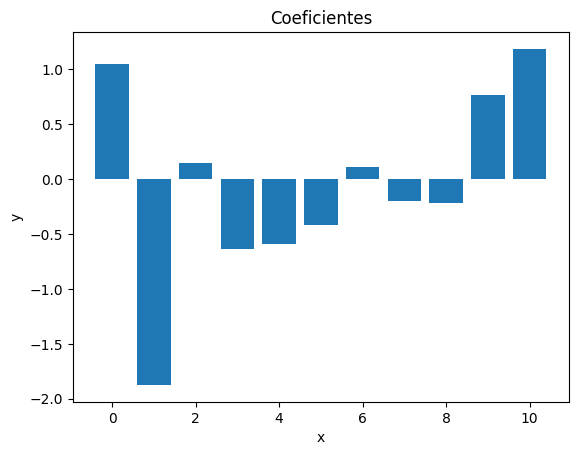

In [70]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [71]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [72]:
X_test.shape

(800, 11)

In [73]:
predictions = model.predict(X_test)

In [74]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[130 269]
 [  6 395]]


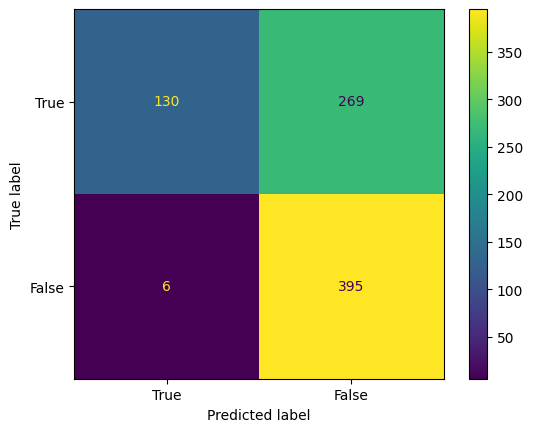

In [75]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrixR = metrics.confusion_matrix(predictions,y_test,labels=[1,0])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixR.T, display_labels = [True,False])
cm_display.plot()
plt.show() 

In [76]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.66
precision:  0.96
recall 0.33
f1_score:  0.49
matthews_score:  0.41


In [77]:
X_train.shape

(800, 11)

In [78]:
X_test.shape

(800, 11)

In [79]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [85]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
#X_train_cv=X_cv
#Y_train_cv=Y_cv
X_train_cv=X_test
Y_train_cv=y_test

In [86]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20,shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acuracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acuracy:: 0.950000 (0.035267)
Logistic Regression Precision:: 0.930000 (0.051037)
Logistic Regression Recall:: 0.970000 (0.030520)
Logistic Regression F1-score:: 0.950000 (0.030876)


In [87]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.890000 (0.075453)


In [88]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [89]:
#linear_model

In [90]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.99      0.74       401
           1       0.96      0.33      0.49       399

    accuracy                           0.66       800
   macro avg       0.78      0.66      0.61       800
weighted avg       0.77      0.66      0.61       800



In [93]:
print(confusion_matrix( y_test,y_predict,labels=[1,0]))

[[130 269]
 [  6 395]]


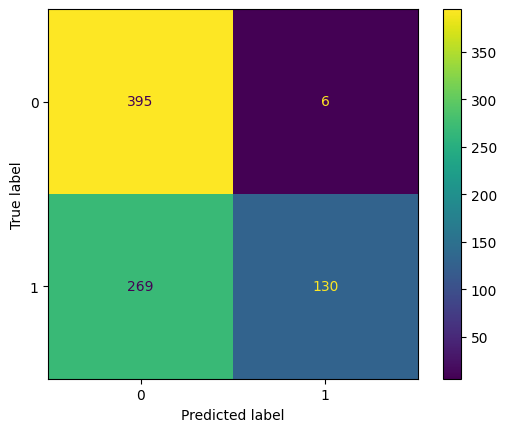

In [94]:
cm = confusion_matrix( y_test,y_predict)
ConfusionMatrixDisplay(cm).plot()

In [910]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [911]:
test.columns[:-1]

Index(['entropia_total', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_trigram', 'bi_ent_trip_rel'],
      dtype='object')

In [912]:
explainer.expected_value

-0.12662600801765708

In [913]:
X_test

array([[0.76154571, 1.        , 0.        , ..., 0.09615385, 0.        ,
        0.66666667],
       [0.82437952, 0.84151355, 0.31557324, ..., 0.46568627, 0.        ,
        0.        ],
       [0.84040214, 0.85611554, 0.2482102 , ..., 0.11904762, 0.        ,
        0.25      ],
       ...,
       [0.8539114 , 0.85346711, 0.29023606, ..., 0.17857143, 0.        ,
        0.16666667],
       [0.81683946, 0.8509505 , 0.27759438, ..., 0.22135417, 0.09333333,
        0.        ],
       [0.89224003, 0.85236207, 0.3054067 , ..., 0.36458333, 0.        ,
        0.        ]])

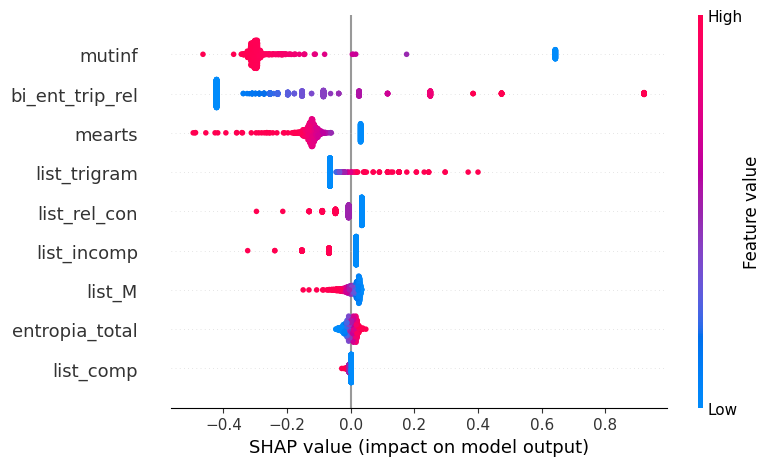

In [914]:
shap.plots.beeswarm(shap_values)

[0.93726687 0.85034708 0.30620266 0.         0.25       0.375
 0.5        0.33333333 0.46666667 0.         0.08928571 0.14285714] 0 0


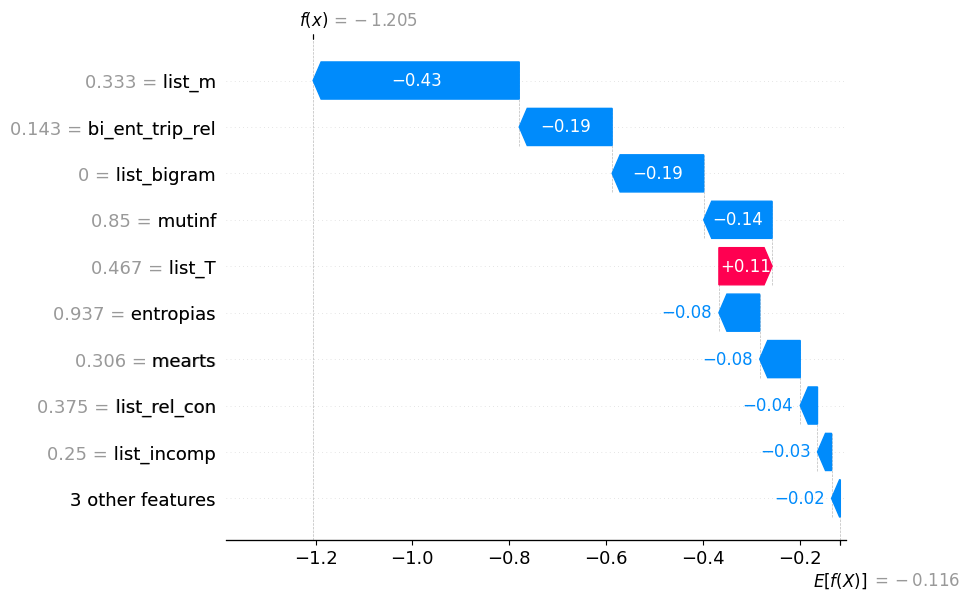

In [87]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [88]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.91895558 0.84877941 0.29568875 0.         0.         0.25
 0.23333333 0.16666667 0.56666667 0.         0.03676471 0.33333333]


IndexError: index 1 is out of bounds for axis 2 with size 1

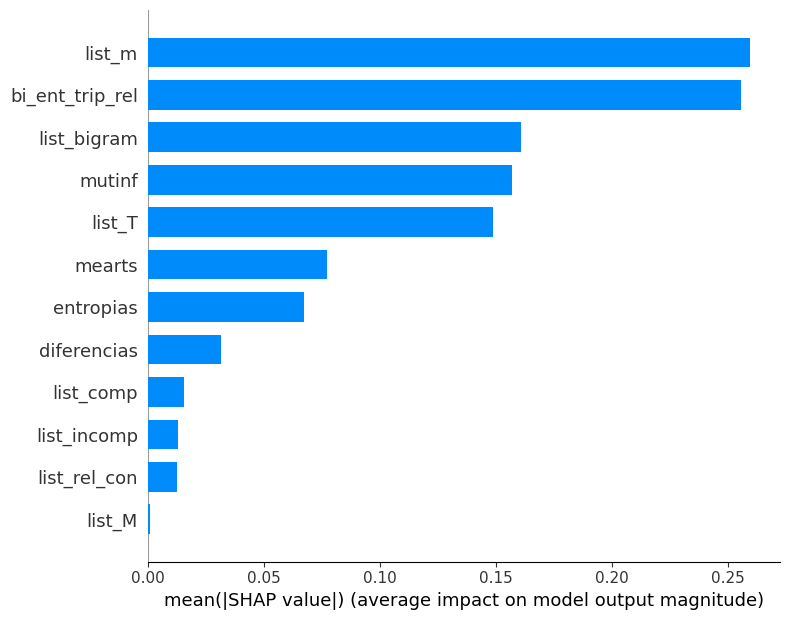

In [89]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

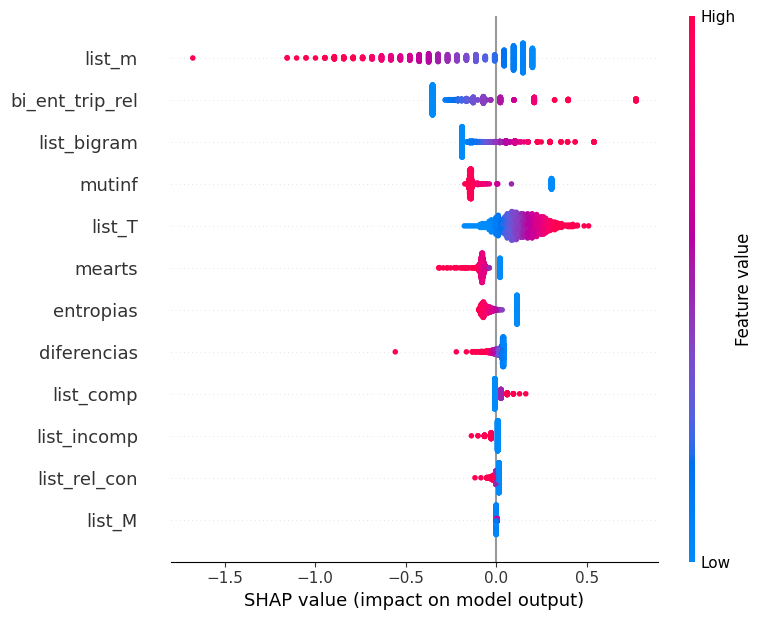

In [90]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

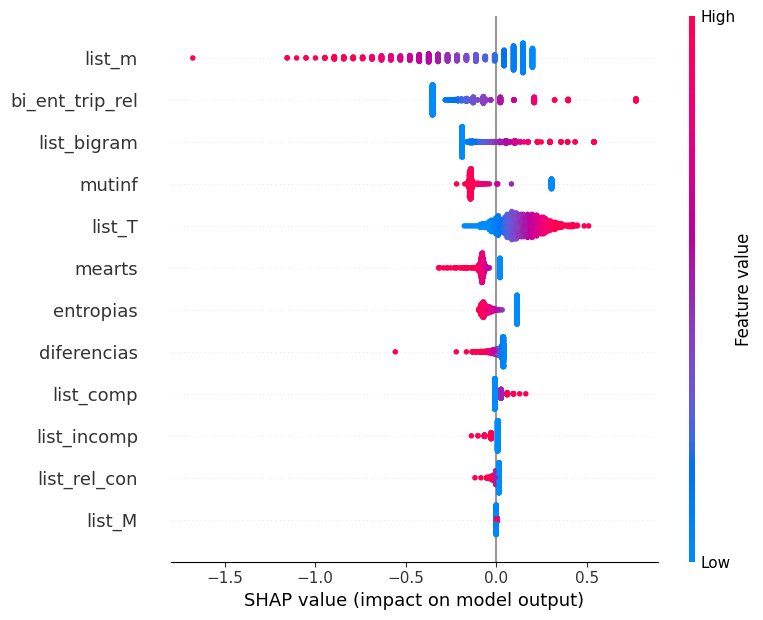

In [91]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

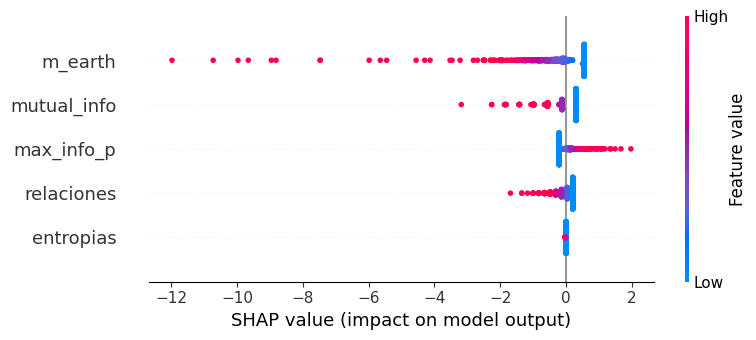

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


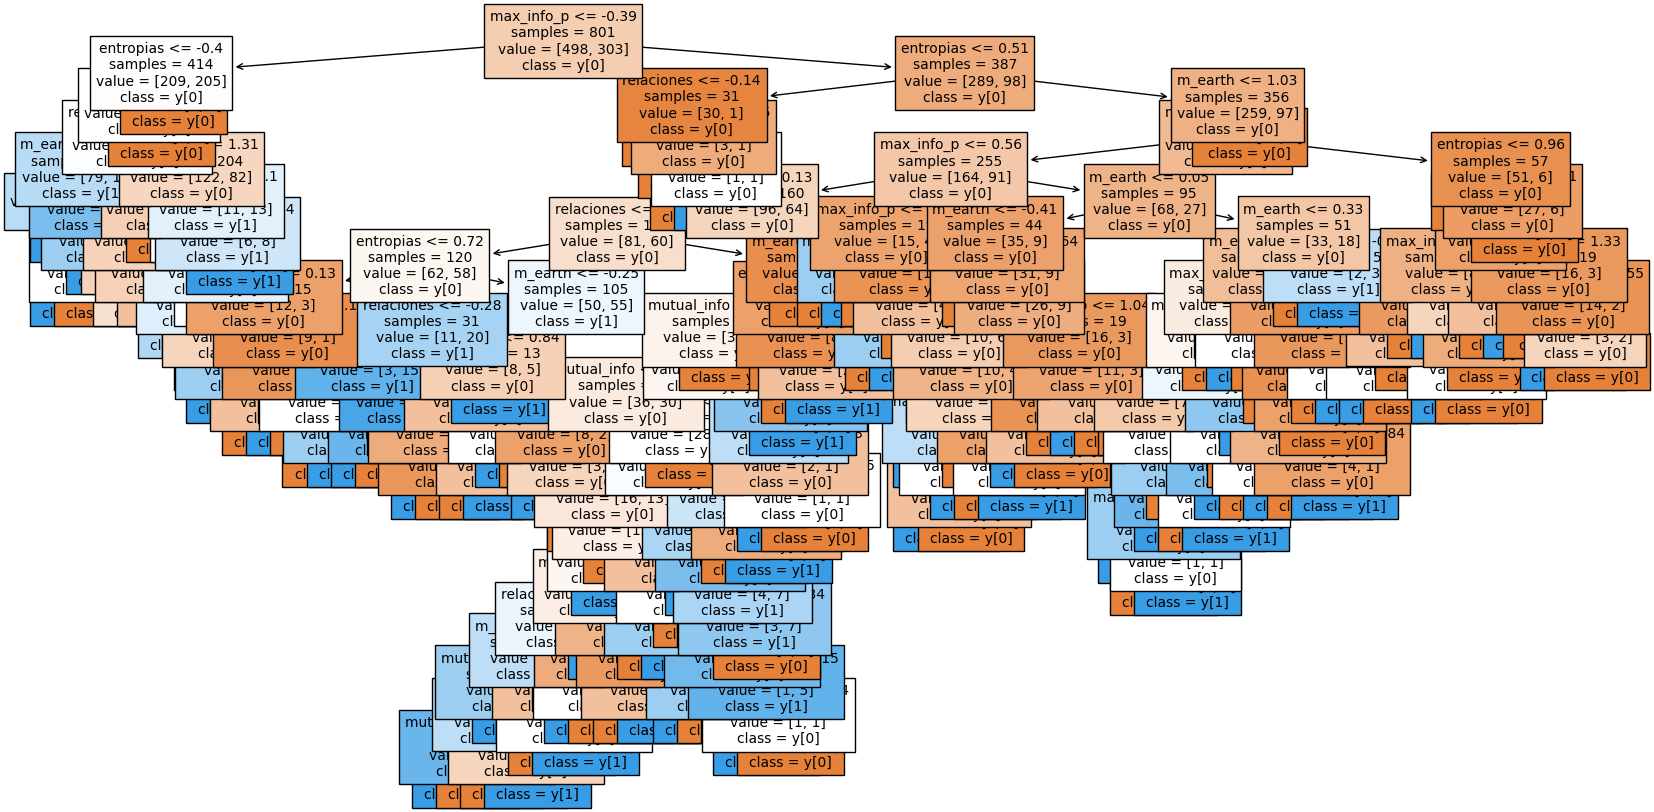

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )